In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from meteostat import Point, Hourly
import plotly.express as px
import math
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8.27)})
plt.rcParams.update({'font.size': 30})

In [2]:
meta_data = pd.read_csv("../data/pump_station_meta_data.csv", index_col=0)
columns=["DateTime", "Power_P1", "Power_P2", "Water_Height", "Outflow"]

In [3]:
def water_level_to_volume(water_level: pd.Series, pump):
    return water_level * (meta_data.loc[pump]["radius"]**2 * math.pi) * 1000

def minutes_to_date_timee(minutes: pd.Series, start_date: datetime):
    return pd.to_timedelta(minutes, unit='m')

In [4]:
# Read in the data PST
pump = "PST234"
year = "2021"
month = "August"

pump = pd.read_csv(f"../data/HistoricData/{pump}/{pump}_{year}_{month}.csv", encoding="cp1252", sep=";", decimal=",")
pump.columns = columns
pump["DateTime"] = pd.to_datetime(pump["DateTime"], format="%d-%m-%Y %H:%M:%S,%f")

In [5]:
pump["Volume"] = water_level_to_volume(pump["Water_Height"], "PST234")

In [6]:
pump

,DateTime,Power_P1,Power_P2,Water_Height,Outflow,Volume
0,2021-08-01 00:00:00.000,0.0,0.0,0.24,0.0,159.542641
1,2021-08-01 00:00:32.611,0.0,0.0,0.25,0.0,166.190251
2,2021-08-01 00:01:18.850,0.0,0.0,0.26,0.0,172.837861
3,2021-08-01 00:01:41.891,0.0,0.0,0.27,0.0,179.485471
4,2021-08-01 00:02:27.973,0.0,0.0,0.28,0.0,186.133082
...,...,...,...,...,...,...
79619,2021-08-31 23:55:32.830,0.0,0.0,0.41,0.0,272.552012
79620,2021-08-31 23:56:07.103,0.0,0.0,0.42,0.0,279.199622
79621,2021-08-31 23:56:30.082,0.0,0.0,0.43,0.0,285.847232
79622,2021-08-31 23:58:02.044,0.0,0.0,0.44,0.0,292.494842


# There is outflow while pumps are not running
It also seems that the outflow is a little delayed on the pumps

Text(0.5, 0, 'Time')

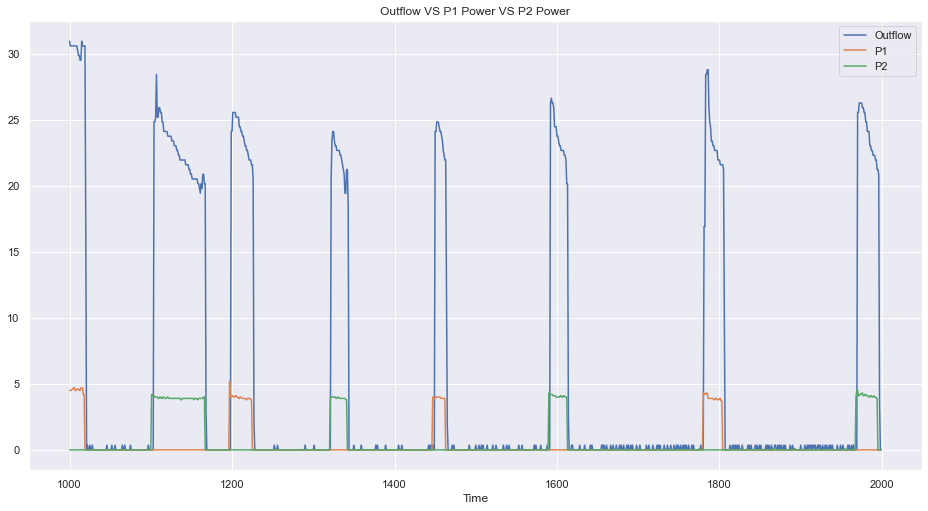

In [7]:
fig, ax = plt.subplots()
pump.Outflow[1000:2000].plot(title="Outflow VS P1 Power VS P2 Power")
pump["Power_P1"][1000:2000].plot()
pump["Power_P2"][1000:2000].plot()
ax.legend(["Outflow","P1", "P2"], loc="upper right")
ax.set_xlabel("Time")

# Outflow vs Water Height
Seems alright, besides the outflow that fluctuates a little. 

Text(0.5, 0, 'Time')

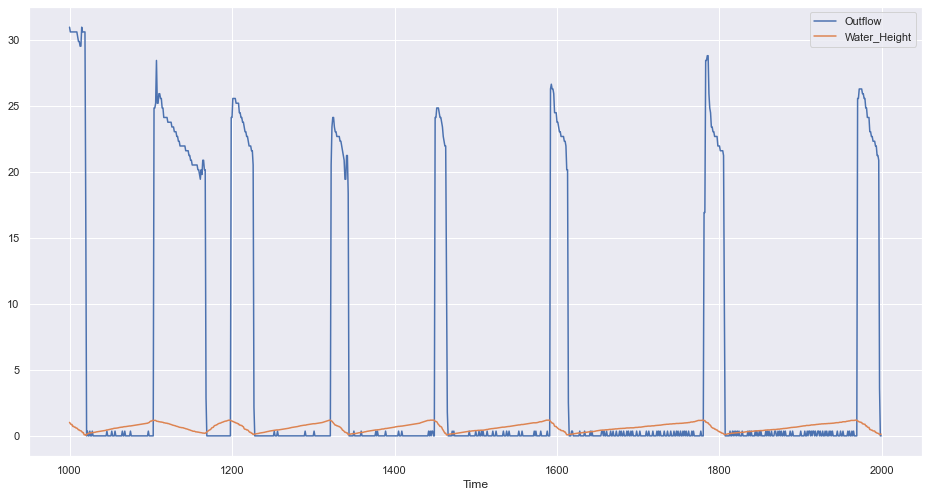

In [8]:
fig, ax = plt.subplots()
# PST237.Outflow[0:1000].plot(title="Outflow VS P1 Power VS P2 Power")
pump["Outflow"][1000:2000].plot()
pump["Water_Height"][1000:2000].plot()
# PST237["Effect_P2"][1000:2000].plot()
ax.legend(["Outflow","Water_Height"], loc="upper right")
ax.set_xlabel("Time")

# General findings
- Date seems not to be evenly distributed

In [13]:
profile = ProfileReport(pump, title="Pandas Profiling Report",  explorative=True)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


array([[<AxesSubplot:title={'center':'Power_P1'}>]], dtype=object)

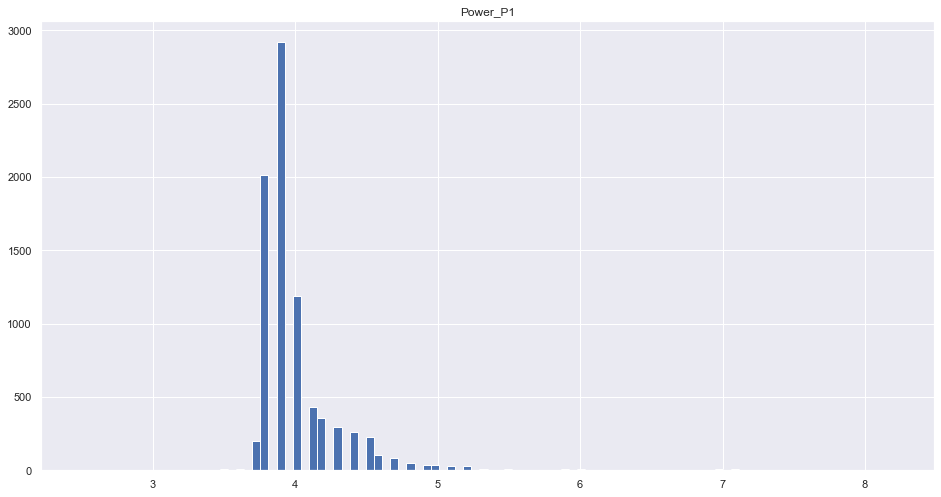

In [5]:
pump[(pump.Power_P1 > 0.5) & (pump.Power_P1 < 10)].hist(column="Power_P1", bins=100)

array([[<AxesSubplot:title={'center':'Power_P2'}>]], dtype=object)

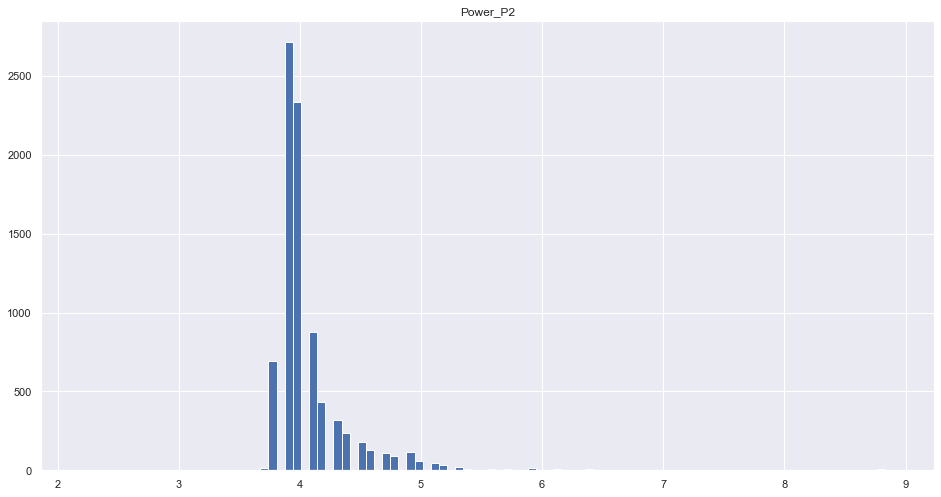

In [6]:
pump[(pump.Power_P2 > 0.5) & (pump.Power_P2 < 10)].hist(column="Power_P2", bins=100)

In [8]:
pump[(pump.Outflow > 0.5) & (pump.Outflow < 100)]

,DateTime,Power_P1,Power_P2,Water_Height,Outflow
71,2021-08-01 01:18:44.654,5.5,0.0,1.20,6.12
72,2021-08-01 01:18:56.135,3.9,0.0,1.20,6.12
73,2021-08-01 01:19:07.647,4.0,0.0,1.20,6.12
74,2021-08-01 01:19:07.694,4.0,0.0,1.17,24.84
75,2021-08-01 01:19:18.848,3.9,0.0,1.17,24.84
...,...,...,...,...,...
79585,2021-08-31 23:30:14.669,0.0,4.0,0.24,20.88
79586,2021-08-31 23:30:25.355,0.0,3.9,0.24,20.88
79587,2021-08-31 23:30:26.275,0.0,3.9,0.20,20.52
79588,2021-08-31 23:30:36.712,0.0,0.0,0.20,20.52
